In [1]:
import pickle
import matplotlib.pyplot as plt
from scipy.spatial import distance


In [2]:
# Extracting data or images function
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
batch_1 = unpickle('data_batch_1')

In [4]:
images = batch_1[b'data']
images.shape

(10000, 3072)

In [5]:
images = batch_1[b'data']
labels = batch_1[b'labels']

In [6]:
required_classes = {1: 'automobile', 4: 'deer', 8: 'ship'}
required_images = {label: [] for label in required_classes.keys()}

In [7]:
for idx, label in enumerate(labels):
    if label in required_classes and len(required_images[label]) < 30:
        required_images[label].append(images[idx])
    if all(len(imgs) == 30 for imgs in required_images.values()):
        break

In [8]:
for label, imgs in required_images.items():
    print(f"Collected {len(imgs)} images for class '{required_classes[label]}'")

Collected 30 images for class 'automobile'
Collected 30 images for class 'deer'
Collected 30 images for class 'ship'


In [9]:
images.shape # Shape of the images

(10000, 3072)

In [10]:
for idx, image in enumerate(required_images[1]):
    required_images[1][idx] = image.reshape(3, 32, 32).transpose(1, 2, 0)

for idx, image in enumerate(required_images[4]):
    required_images[4][idx] = image.reshape(3, 32, 32).transpose(1, 2, 0)

for idx, image in enumerate(required_images[8]):
    required_images[8][idx] = image.reshape(3, 32, 32).transpose(1, 2, 0)

In [11]:
import numpy as np

In [12]:
def rgb_to_grayscale(image):
    return np.mean(image, axis=2) # or axis = 3(rgb channel)

In [89]:
bins = np.arange(0, 256, 10) # 51 (0, 5, 10, 15, 20....)
bins

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250])

In [90]:
def calculate_histograms(grayscale_images):
    histograms = []
    for image in grayscale_images:
        histogram, _ = np.histogram(image.flatten(), bins=bins)
        histograms.append(histogram)
    return histograms

In [91]:
grayscale_images = {label: [] for label in required_images.keys()}
for item in required_images.keys(): # 1, 4, 8
    for i in range(len(required_images[item])): # 30
        grayscale_image = rgb_to_grayscale(required_images[item][i])
        grayscale_images[item].append(grayscale_image)

In [92]:
histograms = {label: [] for label in required_images.keys()}
for item in histograms.keys():
    histograms[item] = calculate_histograms(grayscale_images[item])

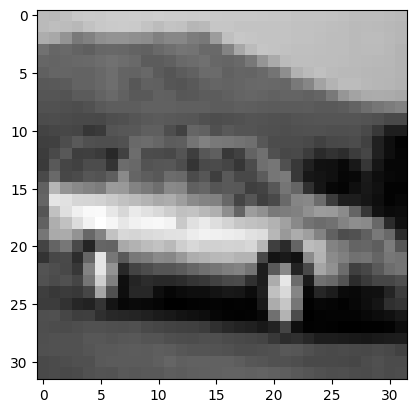

In [93]:
plt.imshow(grayscale_images[1][0], cmap='gray')

(array([2., 6., 5., 4., 2., 1., 0., 2., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250.]),
 <BarContainer object of 25 artists>)

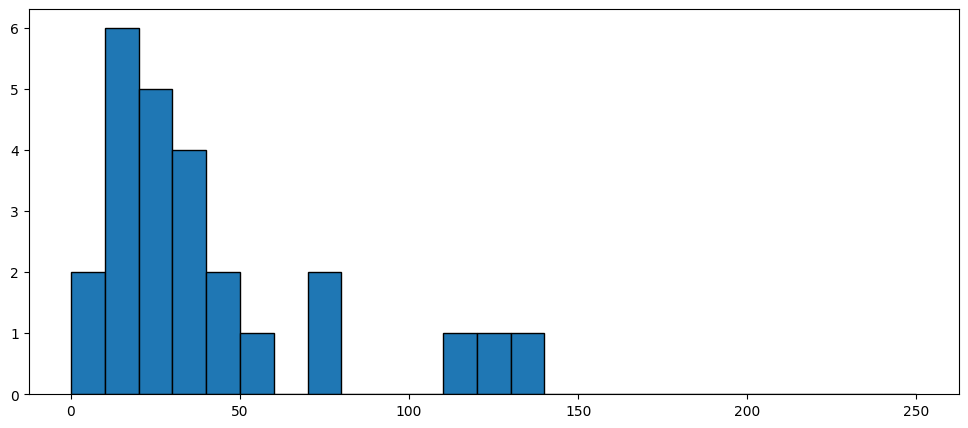

In [94]:
first_image_histogram = histograms[1][0] 
plt.figure(figsize=(12, 5))
plt.hist(first_image_histogram, bins=bins, edgecolor='black')

In [95]:
test_batch = unpickle('test_batch')
labels = test_batch[b'labels']
test_required_images = {label: [] for label in required_classes.keys()}

In [96]:
test_images = test_batch[b'data']

for idx, label in enumerate(labels):
    if label in required_classes and len(test_required_images[label]) < 10:
        test_required_images[label].append(test_images[idx])
    if all(len(imgs) == 10 for imgs in test_required_images.values()):
        break

In [97]:
for idx, image in enumerate(test_required_images[1]):
    test_required_images[1][idx] = image.reshape(3, 32, 32).transpose(1, 2, 0)

for idx, image in enumerate(test_required_images[4]):
    test_required_images[4][idx] = image.reshape(3, 32, 32).transpose(1, 2, 0)

for idx, image in enumerate(test_required_images[8]):
    test_required_images[8][idx] = image.reshape(3, 32, 32).transpose(1, 2, 0)

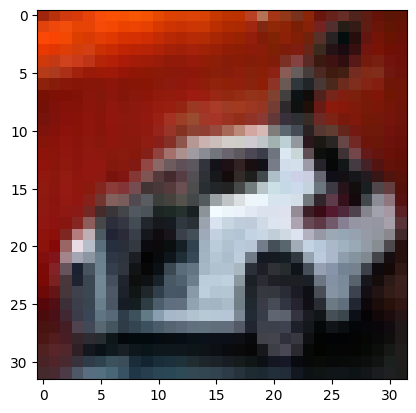

In [98]:
plt.imshow(test_required_images[1][0])

In [99]:
test_grayscale_images = {label: [] for label in required_classes.keys()}

for item in test_required_images.keys(): # 1, 4, 8
    for i in range(len(test_required_images[item])): # 10
        grayscale_image = rgb_to_grayscale(test_required_images[item][i])
        test_grayscale_images[item].append(grayscale_image)

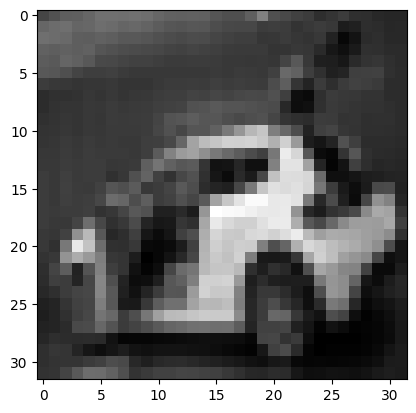

In [100]:
plt.imshow(test_grayscale_images[1][0], cmap='gray')

In [101]:
test_histograms = {label: [] for label in required_classes.keys()}
for item in test_histograms.keys():
    test_histograms[item] = calculate_histograms(test_grayscale_images[item])


(array([ 3., 10.,  1.,  2.,  1.,  2.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250.]),
 <BarContainer object of 25 artists>)

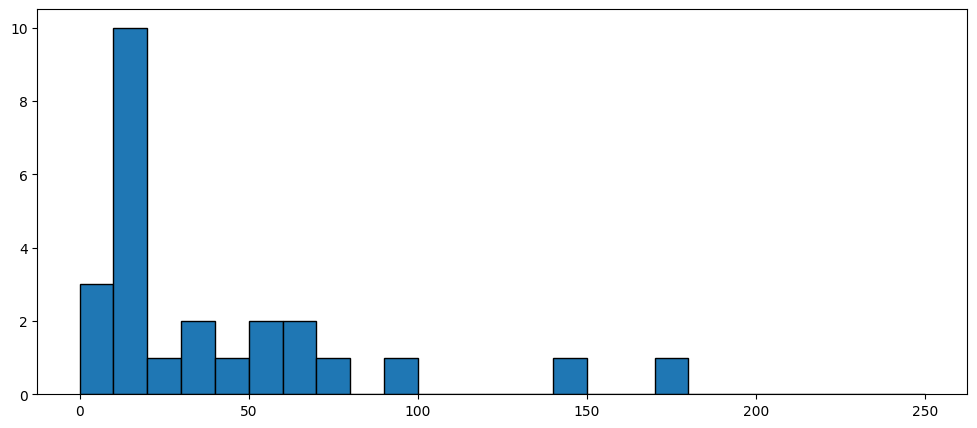

In [102]:
first_test_image_histogram = test_histograms[1][0] 
plt.figure(figsize=(12, 5))
plt.hist(first_test_image_histogram, bins=bins, edgecolor='black')

In [103]:
train_histograms = []
train_labels = []

for label, histograms in histograms.items():
    for histogram in histograms:
        train_histograms.append(histogram)
        train_labels.append(label)

train_labels = np.array(train_labels)
train_histograms = np.array(train_histograms)
print(train_labels.shape)
print(train_histograms.shape)

(90,)
(90, 25)


In [104]:
testing_histograms = []
test_labels = []

for label, histograms in test_histograms.items():
    for histogram in histograms:
        testing_histograms.append(histogram)
        test_labels.append(label)

test_labels = np.array(test_labels)
testing_histograms = np.array(testing_histograms)
print(test_labels.shape)
print(testing_histograms.shape)

(30,)
(30, 25)


In [105]:
def classify_images(testing_histograms, train_histograms, train_labels):
    predictions = []
    for test_hist in testing_histograms:
        dits = []

        for train_hist in train_histograms:
            d = distance.euclidean(test_hist, train_hist)
            dits.append(d)
        min_index = np.argmin(dits)

        predicted_class = train_labels[min_index]
        predictions.append(predicted_class)

    return predictions

In [106]:
predictions = classify_images(testing_histograms, train_histograms, train_labels)

In [107]:
def calculate_accuracy(predicted_labels, true_labels):
    correct_predictions = np.sum(predicted_labels == true_labels)
    accuracy = correct_predictions / len(true_labels)
    return accuracy

calculate_accuracy(predictions, test_labels)

0.6666666666666666